In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
mnase = pd.read_hdf('data/mnase_seq_merged_sampled.h5.z')

In [3]:
orfs = pd.read_csv('data/orfs_cd_paper_dataset.csv').set_index('orf_name')

In [4]:
mnase_0 = mnase[mnase.time == 0.0]
mnase_120 = mnase[mnase.time == 120.0]

In [8]:
gene = orfs.loc['YPR167C']

In [166]:
from src.vit_img_gen import ViTImgGen

# Partitions lengths of fragments into equal sized (length-wise) patches
# Small fragments: 30-79
# Intermediate fragments: 80-129
# Nucleosomal fragments: 130-200
len_cuts = [45, 90, 140, 201]
window = 1024

# Window = 1024
# Resize = 64   (16 downscale)
# Patch size = 4
# 64 / 4 = 16 column patches
# 1024 / 16 = 64 bps per patch
# 12x64 shaped images
patch_size = 8
sublength_resize_height = patch_size # times 3 vertical patches of height
img_width = 128


vit_gen = ViTImgGen(mnase_120, window, sublength_resize_height, len_cuts,
                    img_width, patch_size)


In [167]:
from src.find_small_plus1 import shift_for_p1

img, scaled_img, smoothed, img_slices, p1 = vit_gen.get_mnase_img(gene)

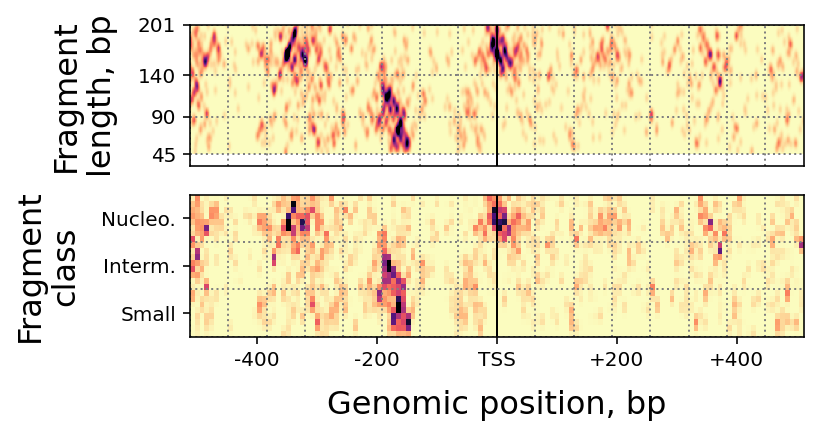

In [168]:
vit_gen.plot_resized_img()

In [171]:
from src.vit_data import load_cd_data_24x128
vit_data = load_cd_data_24x128()

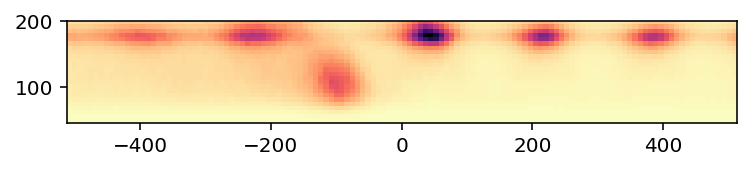

In [180]:
composite = vit_data.all_imgs.sum(axis=0)[0]
plt.imshow(composite, cmap='magma_r', origin='lower', extent=[-512, 512, 45, 201])

In [182]:
from src.vit_data import load_cd_data_24x128_p1
vit_data_p1 = load_cd_data_24x128_p1()

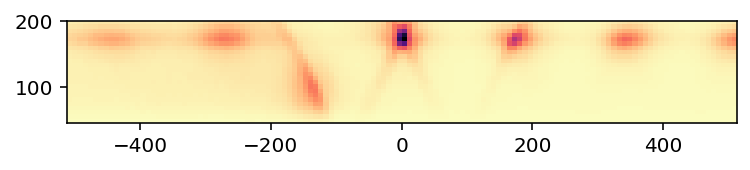

In [183]:
composite = vit_data_p1.all_imgs.sum(axis=0)[0]
plt.imshow(composite, cmap='magma_r', origin='lower', extent=[-512, 512, 45, 201])

In [184]:
vit_data_p1.plot_gene

AttributeError: 'ViTData' object has no attribute 'plot_gene'